In [ ]:
from urllib.request import urlretrieve
import os
from zipfile import ZipFile

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

        
        
#download('Url of the file','Name of the file to be saved')
#print("All the files are downloaded")


#If the downloaded file is a zip file than you can use below function to unzip it.
def uncompress_features_labels(dir):
    if(os.path.isdir('Mydata')):
        print('Data extracted')
    else:
        with ZipFile(dir) as zipf:
            zipf.extractall('Mydata')
#uncompress_features_labels('data.zip')

In [2]:
uncompress_features_labels('FinalData.zip')

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

df=pd.read_csv("Mydata/FinalData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128912 entries, 0 to 1128911
Data columns (total 53 columns):
LocationID                       1128912 non-null object
LONGITUDE                        1128912 non-null float64
LATITUDE                         1128912 non-null float64
EventDate                        1128912 non-null object
DateRange                        1128912 non-null object
Autres_incendies                 1128912 non-null int64
Sum_Autres_incendies             1128912 non-null int64
Incendie_de_batiments            1128912 non-null int64
Sum_Incendie_de_batiments        1128912 non-null int64
Premier_Repondant                1128912 non-null int64
Sum_Premier_Repondant            1128912 non-null int64
Sans_incendie                    1128912 non-null int64
Sum_Sans_incendie                1128912 non-null int64
Crime                            1128912 non-null int64
Sum_Crime                        1128912 non-null int64
Alarmes_incendies                1128912

In [2]:
#Sort by date 
df=df.sort_values('EventDate',ascending=True)
df.shape

(1128912, 53)

In [3]:
df = df.drop(['LocationID','LookAHead'],axis=1)
columns_to_parse = list(df.select_dtypes(include=['object']).columns)

for cparse in columns_to_parse:
  print(cparse)
  df[cparse] = pd.to_datetime(df[cparse])
  
for cparse in columns_to_parse:
  #cday = 'day_{}'.format(cparse)
  cmonth = 'month_{}'.format(cparse)
  #cyear = 'year_{}'.format(cparse)
  
  #df[cday] = df[cparse].dt.day
  df[cmonth] = df[cparse].dt.month
  #df[cyear] = df[cparse].dt.year
  
df = df.drop(['DateRange'],axis=1)

EventDate
DateRange


In [4]:
import datetime
#We choose dates Before the 2017-10-31 so that we have enough data to look forward
df=df[df['EventDate']<=datetime.date(year=2017,month=6,day=30)]
# And We choose dates after 2009-06-30 so that we have enough data to look backward and build history
df=df[df['EventDate']>datetime.date(year=2009,month=6,day=30)]
df.shape

(960234, 52)

In [5]:
df=df[df['Incendie_de_batiments']!=1]
print('Data_shape',df.shape)

Data_shape (949843, 52)


In [8]:
for i in enumerate(list(df.columns.values)):
  print (i)

(0, 'LONGITUDE')
(1, 'LATITUDE')
(2, 'EventDate')
(3, 'Autres_incendies')
(4, 'Sum_Autres_incendies')
(5, 'Incendie_de_batiments')
(6, 'Sum_Incendie_de_batiments')
(7, 'Premier_Repondant')
(8, 'Sum_Premier_Repondant')
(9, 'Sans_incendie')
(10, 'Sum_Sans_incendie')
(11, 'Crime')
(12, 'Sum_Crime')
(13, 'Alarmes_incendies')
(14, 'Sum_Alarmes_incendies')
(15, 'False_Alertes_Annulations')
(16, 'Sum_False_Alertes_Annulations')
(17, 'TotalFires')
(18, 'Couples_No_Children')
(19, 'CouplesWithChildren')
(20, 'SizeOF House')
(21, 'Detached_House')
(22, 'Appartment_FiveFloors')
(23, 'OtherType')
(24, 'Semi_detached')
(25, 'TownHouse')
(26, 'Duplex')
(27, 'Appartment_less_5Florrs')
(28, 'OtherDtached')
(29, 'MObileHome')
(30, 'LandLord')
(31, 'Renter')
(32, '1_4Rooms')
(33, '5_rooms')
(34, '6_rooms')
(35, '7_rooms')
(36, '8_RoomsOrmore')
(37, 'Average_Rooms')
(38, 'Simple_Maintenance')
(39, 'Major_repairs')
(40, 'Median_house_value')
(41, 'Average_House_Value')
(42, 'AverageHouseholdIncome2015')
(

In [6]:
#//before removing duplicates  'LONGITUDE','LATITUDE','EventDate','month_EventDate',    ,'day_EventDate','month_EventDate','year_EventDate'

t=df.iloc[:,0:51].drop(['Autres_incendies','Premier_Repondant','Sans_incendie','Crime',
          'Alarmes_incendies','False_Alertes_Annulations',
          'Fire_Y_N','TotalFires','Incendie_de_batiments','month_EventDate',
         'MedianHouseholdIncome2015','Median_house_value','LandLord','Renter'],axis=1)
print(t.shape)
t.head(5)




(949843, 37)


,LONGITUDE,LATITUDE,EventDate,Sum_Autres_incendies,Sum_Incendie_de_batiments,Sum_Premier_Repondant,Sum_Sans_incendie,Sum_Crime,Sum_Alarmes_incendies,Sum_False_Alertes_Annulations,...,Average_Rooms,Simple_Maintenance,Major_repairs,Average_House_Value,AverageHouseholdIncome2015,Avg_flors,Avg_YearBuilt,Avg_LandArea,Avg_HomeArea,Fire_next6Months_Y_N
1054123,-73.803280,45.441335,2009-07-01,0,0,2,0,0,1,0,...,6.931448,8980.629329,669.430018,466235.1973,120585.33770,1.800,1976.200,579.1000,166.325000,0
88465,-73.540606,45.577049,2009-07-01,0,0,14,3,0,2,0,...,4.544139,53835.641270,4668.286019,377169.2827,62037.57374,2.650,1965.275,270.8750,399.200000,0
981208,-73.694068,45.542716,2009-07-01,0,0,3,2,0,0,0,...,5.036385,42509.006990,3314.208471,544604.1386,93691.50810,2.025,1955.125,376.4875,264.825000,0
21235,-73.504466,45.664573,2009-07-01,0,0,3,0,0,0,0,...,5.132363,26640.044490,1751.918071,312101.0809,67160.61247,1.700,1970.850,1602.0000,903.008333,0
717835,-73.624902,45.529648,2009-07-01,0,0,8,2,0,3,0,...,5.428930,27609.353220,2770.540134,732568.0598,134874.94140,2.650,1944.600,262.2500,431.400000,1


In [0]:
#//remove duplicates
#det=t.drop_duplicates(subset=('LONGITUDE','LATITUDE','day_EventDate','month_EventDate','year_EventDate'), keep='last')
#print(det.shape)


In [7]:

#//remove duplicates
det=t.drop_duplicates(list(df.iloc[:,3:51].drop(['Autres_incendies','Premier_Repondant','Sans_incendie','Crime',
          'Alarmes_incendies','False_Alertes_Annulations',
          'Fire_Y_N','TotalFires','Incendie_de_batiments','month_EventDate',
         'MedianHouseholdIncome2015','Median_house_value','LandLord','Renter'],axis=1).columns.values), keep='last')
print(det.shape)

(587784, 37)


In [15]:
#//X, y
y = det['Fire_next6Months_Y_N']
print('yshape',y.shape)
x=det.drop(['Fire_next6Months_Y_N'],axis=1)
print('xshape',x.shape)


yshape (587784,)
xshape (587784, 36)
1054123    0
88465      0
981208     0
21235      0
717835     1
Name: Fire_next6Months_Y_N, dtype: int64


In [12]:
#Verify Predictors
for i in enumerate(list(x.columns.values)):
    print (i)

(0, 'LONGITUDE')
(1, 'LATITUDE')
(2, 'EventDate')
(3, 'Sum_Autres_incendies')
(4, 'Sum_Incendie_de_batiments')
(5, 'Sum_Premier_Repondant')
(6, 'Sum_Sans_incendie')
(7, 'Sum_Crime')
(8, 'Sum_Alarmes_incendies')
(9, 'Sum_False_Alertes_Annulations')
(10, 'Couples_No_Children')
(11, 'CouplesWithChildren')
(12, 'SizeOF House')
(13, 'Detached_House')
(14, 'Appartment_FiveFloors')
(15, 'OtherType')
(16, 'Semi_detached')
(17, 'TownHouse')
(18, 'Duplex')
(19, 'Appartment_less_5Florrs')
(20, 'OtherDtached')
(21, 'MObileHome')
(22, '1_4Rooms')
(23, '5_rooms')
(24, '6_rooms')
(25, '7_rooms')
(26, '8_RoomsOrmore')
(27, 'Average_Rooms')
(28, 'Simple_Maintenance')
(29, 'Major_repairs')
(30, 'Average_House_Value')
(31, 'AverageHouseholdIncome2015')
(32, 'Avg_flors')
(33, 'Avg_YearBuilt')
(34, 'Avg_LandArea')
(35, 'Avg_HomeArea')


In [11]:
#Use this if you want to perform random split

X_train , X_test,y_train, y_test = train_test_split( 
            x, y , test_size=0.34, random_state= 165 )






#Run only if you want to measure not at random but in sequence
#rows_train=det['EventDate']<datetime.date(year=2017,month=1,day=1)
#rows_test=det['EventDate']>=datetime.date(year=2017,month=1,day=1)
#trainrows=det[rows_train].shape[0]
#testrows=det[rows_test].shape[0]
#print(trainrows,testrows)

#Use only if you want to run sequntial. Split by date train = Upto (2017-01-01)
# test = >2017-01-01 to 2017-10-30

#X_train=x[:trainrows]
#X_test=x[trainrows:]
#y_train=y[:trainrows]
#y_test=y[trainrows:]

In [12]:
print('X_train.shape' , X_train.shape)
print('X_test.shape' , X_test.shape)


X_train.shape (387937, 36)
X_test.shape (199847, 36)


In [13]:
X_train=X_train.drop(['LONGITUDE','LATITUDE','EventDate'],axis=1)
#X_train=X_train.drop(['EventDate'],axis=1)
X_test_backup=X_test.copy()
X_test=X_test.drop(['LONGITUDE','LATITUDE','EventDate'],axis=1)
#X_test=X_test.drop(['EventDate'],axis=1)

In [14]:
print('X_train.shape' , X_train.shape)
print('X_test.shape' , X_test.shape)

X_train.shape (387937, 33)
X_test.shape (199847, 33)


## **Plain Decision Tree Model**

In [ ]:
#Decision Tree
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=60,random_state=167)
dtree.fit(X_train,y_train)
#Export model
joblib.dump(dtree,'model.joblib')
!gsutil cp model.joblib gs://projectcsv/model.joblib


#### Create the input file for our model

In [46]:
df = X_test.head(5)
df.to_csv('input',index=False,encoding='utf-8')
!gsutil cp input gs://projectcsv/input

Copying file://input [Content-Type=application/octet-stream]...
/ [1 files][  2.2 KiB/  2.2 KiB]                                                
Operation completed over 1 objects/2.2 KiB.                                      


In [18]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, cohen_kappa_score
print('Recall:{0:0.3f}'.format(recall_score(y_test,y_pred)))
print('Precision:{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('f1:{0:0.3f}'.format(f1_score(y_test,y_pred)))
print('kappa:{0:0.3f}'.format(cohen_kappa_score(y_test,y_pred)))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
VarImp=[]
k=0
for i in list(X_test.columns.values):
  VarImp.append([str(X_test.columns.values[k]),(dtree.feature_importances_[k]*100)])
  k+=1
VarImpdf = pd.DataFrame(VarImp,columns=['Feature','Importance'])
#VarImpdf=VarImpdf.sort_values('Importance',ascending=False)
print(VarImpdf)


Recall:0.455
Precision:0.439
f1:0.447
kappa:0.403
Confusion Matrix
[[176722   8496]
 [  7972   6657]]
                          Feature  Importance
0            Sum_Autres_incendies    5.637335
1       Sum_Incendie_de_batiments    6.612129
2           Sum_Premier_Repondant   19.512906
3               Sum_Sans_incendie   12.801730
4                       Sum_Crime    0.219568
5           Sum_Alarmes_incendies   12.812887
6   Sum_False_Alertes_Annulations    0.521693
7             Couples_No_Children    0.871509
8             CouplesWithChildren    1.299685
9                    SizeOF House    1.372691
10                 Detached_House    1.342144
11          Appartment_FiveFloors    1.769533
12                      OtherType    1.024366
13                  Semi_detached    1.480767
14                      TownHouse    1.787599
15                         Duplex    1.460210
16        Appartment_less_5Florrs    1.129012
17                   OtherDtached    1.314851
18                     M

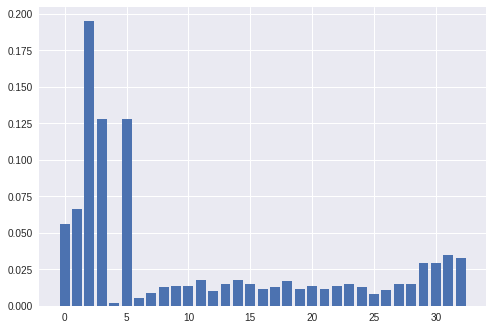

In [19]:
from matplotlib import pyplot
pyplot.bar(range(len(dtree.feature_importances_)), dtree.feature_importances_)
pyplot.show()

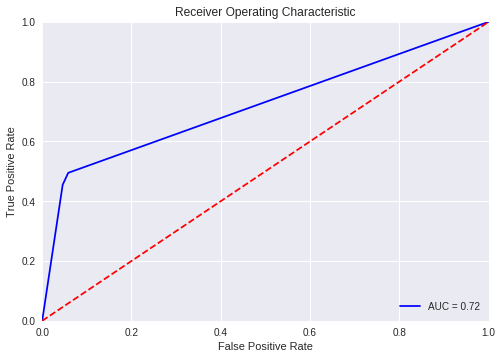

In [20]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
from sklearn.metrics import classification_report, cohen_kappa_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    185218
           1       0.44      0.46      0.45     14629

   micro avg       0.92      0.92      0.92    199847
   macro avg       0.70      0.70      0.70    199847
weighted avg       0.92      0.92      0.92    199847



## **Random Forest Tree Model**

In [0]:
#Random Forest Tree

from sklearn.ensemble import RandomForestClassifier
rndf = RandomForestClassifier(n_estimators=100, max_depth=60,random_state=167)
rndf.fit(X_train,y_train)
y_pred = rndf.predict(X_test)


In [23]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, cohen_kappa_score
print('Recall:{0:0.3f}'.format(recall_score(y_test,y_pred)))
print('Precision:{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('f1:{0:0.3f}'.format(f1_score(y_test,y_pred)))
print('kappa:{0:0.3f}'.format(cohen_kappa_score(y_test,y_pred)))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
VarImp=[]
k=0
for i in list(X_test.columns.values):
  VarImp.append([str(X_test.columns.values[k]),(rndf.feature_importances_[k]*100)])
  k+=1
VarImpdf = pd.DataFrame(VarImp,columns=['Feature','Importance'])
#VarImpdf=VarImpdf.sort_values('Importance',ascending=False)
print(VarImpdf)


Recall:0.446
Precision:0.617
f1:0.518
kappa:0.486
Confusion Matrix
[[181173   4045]
 [  8105   6524]]
                          Feature  Importance
0            Sum_Autres_incendies    5.627817
1       Sum_Incendie_de_batiments    4.416537
2           Sum_Premier_Repondant   23.562459
3               Sum_Sans_incendie   14.230483
4                       Sum_Crime    0.223628
5           Sum_Alarmes_incendies   12.848393
6   Sum_False_Alertes_Annulations    0.466472
7             Couples_No_Children    1.352183
8             CouplesWithChildren    1.376694
9                    SizeOF House    1.478065
10                 Detached_House    1.527576
11          Appartment_FiveFloors    1.497550
12                      OtherType    1.347506
13                  Semi_detached    1.426204
14                      TownHouse    1.550613
15                         Duplex    1.474393
16        Appartment_less_5Florrs    1.332883
17                   OtherDtached    1.456652
18                     M

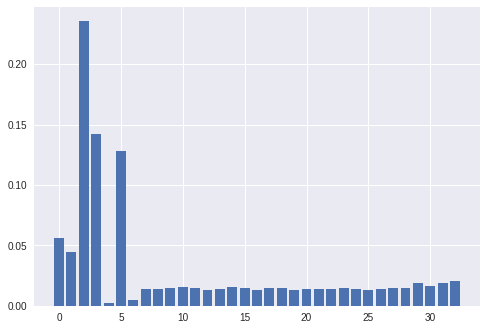

In [24]:
from matplotlib import pyplot
pyplot.bar(range(len(rndf.feature_importances_)), rndf.feature_importances_)
pyplot.show()

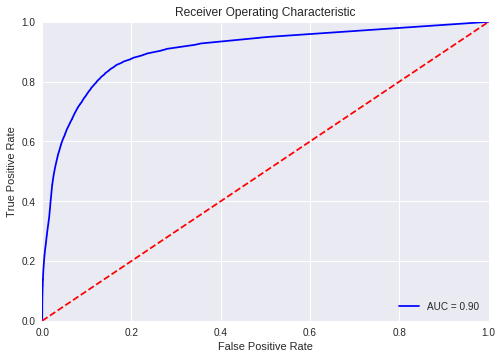

In [25]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rndf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
from sklearn.metrics import classification_report, cohen_kappa_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    185218
           1       0.62      0.45      0.52     14629

   micro avg       0.94      0.94      0.94    199847
   macro avg       0.79      0.71      0.74    199847
weighted avg       0.93      0.94      0.93    199847



## **XG Boost model** 

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=5,learning_rate=0.13, n_estimators=1500, silent=True, objective='binary:logistic')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
#predictions = [round(value) for value in y_pred]





In [28]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, cohen_kappa_score
print('Recall:{0:0.3f}'.format(recall_score(y_test,y_pred)))
print('Precision:{0:0.3f}'.format(precision_score(y_test,y_pred)))
print('f1:{0:0.3f}'.format(f1_score(y_test,y_pred)))
print('kappa:{0:0.3f}'.format(cohen_kappa_score(y_test,y_pred)))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
VarImp=[]
k=0
for i in list(X_test.columns.values):
  VarImp.append([str(X_test.columns.values[k]),(xgb.feature_importances_[k]*100)])
  k+=1
VarImpdf = pd.DataFrame(VarImp,columns=['Feature','Importance'])
#VarImpdf=VarImpdf.sort_values('Importance',ascending=False)
print(VarImpdf)


Recall:0.129
Precision:0.814
f1:0.223
kappa:0.207
Confusion Matrix
[[184786    432]
 [ 12741   1888]]
                          Feature  Importance
0            Sum_Autres_incendies    3.018483
1       Sum_Incendie_de_batiments    2.469395
2           Sum_Premier_Repondant   12.506001
3               Sum_Sans_incendie    8.617379
4                       Sum_Crime    0.234037
5           Sum_Alarmes_incendies    8.119299
6   Sum_False_Alertes_Annulations    0.408065
7             Couples_No_Children    2.361378
8             CouplesWithChildren    2.370379
9                    SizeOF House    2.541407
10                 Detached_House    2.796447
11          Appartment_FiveFloors    2.451392
12                      OtherType    1.260202
13                  Semi_detached    2.466395
14                      TownHouse    3.579573
15                         Duplex    2.571411
16        Appartment_less_5Florrs    1.311210
17                   OtherDtached    1.992319
18                     M

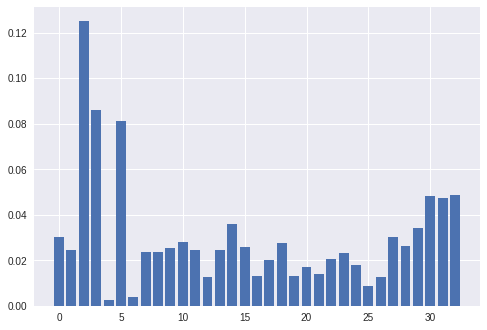

In [29]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

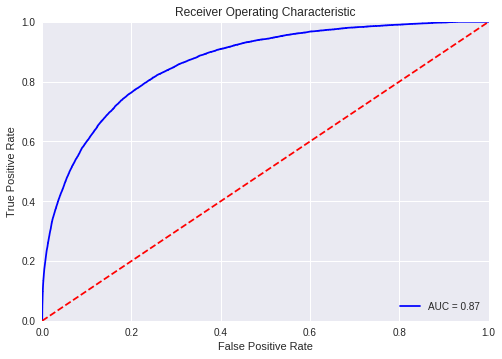

In [30]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [31]:
from sklearn.metrics import classification_report, cohen_kappa_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    185218
           1       0.81      0.13      0.22     14629

   micro avg       0.93      0.93      0.93    199847
   macro avg       0.87      0.56      0.59    199847
weighted avg       0.93      0.93      0.91    199847



Here we will choose the best model and we will add the longitude and latitude along with the event data and export some data for visualization in Tableau


In [32]:
X_test_backup.shape

(199847, 36)

In [0]:
y_pred = rndf.predict(X_test)
Df_ForMap=X_test_backup.copy()
Df_ForMap=Df_ForMap.iloc[:,0:3]
Df_ForMap['y_true']=y_test
Df_ForMap['y_pred']=y_pred

In [0]:
#Df_ForMap[Df_ForMap['y_true']==0].count()

In [0]:
Df_ForMap.to_csv ('FinalMap.csv', index = None, header=True)

In [0]:
##  "Pred:" + str([Y Pred]) +" True:"+str([Y True]) 